### ESMA 4016
### Clasificacion usando Neural Networks y Deep Learning
#### Edgar Acuna 

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Ejemplo1. Neural Nets aplicado a  los datos de las notas en un curso, usando como predictoras E1 y E2

In [12]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")

In [13]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X1)
StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
print y1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [15]:
print X1

[[ 1.63786386  1.38369921]
 [ 1.63786386  1.15427758]
 [ 1.90561172  1.03956676]
 [ 1.43705297  1.23075145]
 [ 1.23624207  1.15427758]
 [ 0.2321876   0.73367125]
 [ 0.2321876   1.34546227]
 [-0.50411902  1.11604064]
 [ 1.16930511 -0.33696302]
 [-0.97267777  1.15427758]
 [-0.10249723  0.77190819]
 [-1.84285831  0.96309288]
 [-0.63799295 -0.03106751]
 [ 0.29912456  0.77190819]
 [ 0.09831367  1.00132982]
 [ 0.29912456 -1.29288648]
 [-0.16943419  0.12188024]
 [ 0.43299849 -0.26048914]
 [ 0.90155725 -1.48407117]
 [-0.30330812 -0.03106751]
 [-0.50411902 -0.60462159]
 [-0.37024509 -0.48991077]
 [ 0.49993546 -0.68109546]
 [-0.16943419  0.38953881]
 [-1.37429956 -0.56638465]
 [-2.31141707 -0.87228016]
 [-0.30330812 -0.94875403]
 [ 0.2321876  -1.52230811]
 [-0.63799295 -0.98699097]
 [-0.97267777 -1.44583423]
 [ 0.36606153 -1.75172974]
 [-1.44123653 -1.02522791]]


In [16]:
#Haciendo el knn con tres vecinos y calculando el porcentaje de precision
mlp = MLPClassifier(hidden_layer_sizes=(10),max_iter=500)
mlp.fit(X1, y1) 

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [17]:
mlp.coefs_

[array([[-1.13172203, -0.05388831, -0.11737737,  0.09583503, -0.01988369,
          0.33400759, -0.30015478,  0.39401325,  0.96306179,  0.42564816],
        [-1.02639887,  0.63587882,  0.80852073,  0.29215627,  0.72042442,
         -0.23458638, -0.53436014,  0.63660202, -0.03455606, -0.65490891]]),
 array([[-0.62612131],
        [ 0.58069066],
        [ 0.38263586],
        [-0.23231969],
        [ 0.81638603],
        [ 0.47912857],
        [-1.23913837],
        [ 0.55593311],
        [ 0.89700275],
        [-0.40393695]])]

In [18]:
mlp.intercepts_

[array([ 0.05880646,  0.98072203,  1.01910204, -0.60225204,  0.58358238,
         0.36578526,  0.05755048,  0.97083283,  0.31869572, -0.16334331]),
 array([ 0.61617183])]

In [19]:
#Calculando las predicciones
pred=mlp.predict(X1)
print(confusion_matrix(y1,pred))

[[ 8  0]
 [ 0 24]]


In [20]:
print(classification_report(y1,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00        32



In [21]:
#Calculando los errores
error=(y1!=pred).sum()
print "Este es el numero de errores=", error

Este es el numero de errores= 0


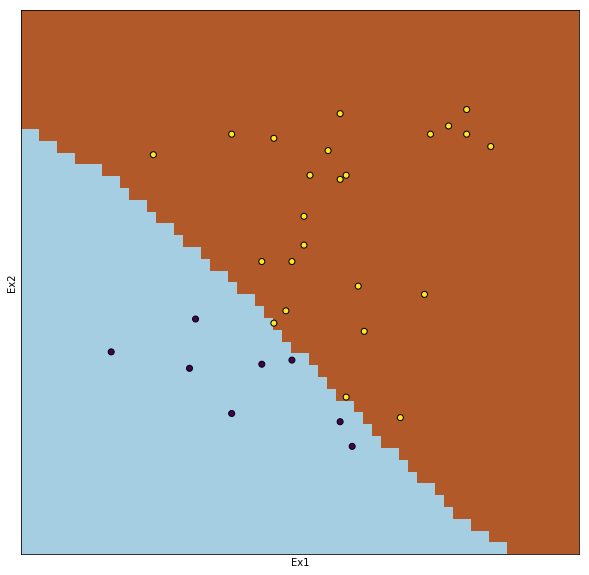

In [22]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(hidden_layer_sizes=(10),max_iter=500)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Ejemplo 2. Nnets aplicado a Diabetes

In [23]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [24]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
mlp=MLPClassifier(hidden_layer_sizes=(10,2),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [26]:
mlp.coefs_

[array([[ 0.0238754 , -0.17527787,  0.41368308,  0.50179752, -0.48202661,
         -0.42248474, -0.13835135,  0.32251397, -0.45653172,  0.8906211 ],
        [ 0.05114529,  0.76642691, -0.45990209, -0.52400485, -0.39286048,
          0.0922199 , -0.30430503,  0.11338529, -0.51287599,  0.91626255],
        [-0.13838136,  0.4135296 , -0.16521875, -0.33749058,  0.51670388,
          0.63268059, -0.1347096 , -0.03473389,  0.21768681, -0.45314893],
        [ 0.46707933, -0.08069913,  0.22635792,  0.46410883, -0.08404349,
          0.10242538, -0.79874069,  0.33585309,  0.10733838,  0.00544505],
        [ 0.12660918, -0.29002661,  0.15031047, -0.4180822 ,  0.04204232,
          0.09333875, -0.1415945 , -0.33411892,  0.04911341,  0.20482754],
        [-0.19215992,  0.35233635,  0.04161978,  0.04397055, -0.41829013,
         -0.92886935, -0.24179328, -0.03228421, -0.09357397,  0.15812148],
        [ 0.07106414,  0.16018064, -0.57713237,  0.41941909, -0.4512286 ,
          0.10294589,  0.1952311

In [27]:
mlp.intercepts_

[array([ 0.10974813,  0.82225332, -0.18253408, -0.71279868,  0.32163954,
        -0.51169394, -0.55207163, -0.62030611,  0.20942608,  0.4917216 ]),
 array([ 0.11785079, -0.18808723]),
 array([-0.10755818])]

In [28]:
pred=mlp.predict(X_test)

In [29]:
mlp.score(X_test, y_test)

0.69791666666666663

In [30]:
print (classification_report(y_test,pred))

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.70      1.00      0.82       134
          2       0.00      0.00      0.00        58

avg / total       0.49      0.70      0.57       192



### Ejemplo 3. Nnet a  Landsat 

In [31]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#Estimacion de la precision con k=3 vecinos  por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(40,10,10),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [33]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[241   0  12   3   0   2]
 [  0 119   0   1   5   0]
 [  7   0  60   0   1 168]
 [  2   0  19   0   7  80]
 [  4   7   1   1  91  10]
 [  1   0  26   0  15 226]]


In [34]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.95      0.93      0.94       258
          2       0.94      0.95      0.95       125
          3       0.51      0.25      0.34       236
          4       0.00      0.00      0.00       108
          5       0.76      0.80      0.78       114
          6       0.47      0.84      0.60       268

avg / total       0.63      0.66      0.62      1109



### IV. Ejemplo de Deep Learning aplicado a Diabetes

In [35]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 9 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.6
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_edgar2017_9rszyt
H2O cluster total nodes:,1
H2O cluster free memory:,1.433 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [36]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

In [37]:
y_pred=dl_model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

0.83203125


In [38]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.119604996131
RMSE: 0.345839552583
LogLoss: 0.371052449153
Mean Per-Class Error: 0.192194029851
AUC: 0.900111940299
Gini: 0.800223880597
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.455950436229: 


,1,2,Error,Rate
1,444.0,56.0,0.112,(56.0/500.0)
2,73.0,195.0,0.2724,(73.0/268.0)
Total,517.0,251.0,0.168,(129.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4559504,0.7514451,166.0
max f2,0.0913918,0.8328015,318.0
max f0point5,0.5998172,0.8039216,124.0
max accuracy,0.5998172,0.8333333,124.0
max precision,0.9998466,1.0,0.0
max recall,0.0164545,1.0,375.0
max specificity,0.9998466,1.0,0.0
max absolute_mcc,0.4559504,0.6255720,166.0
max min_per_class_accuracy,0.3445542,0.7947761,206.0
max mean_per_class_accuracy,0.4559504,0.8078060,166.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9906319,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9793619,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9708912,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9568885,2.8656716,2.8656716,1.0,1.0,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,0.9304069,2.8656716,2.8656716,1.0,1.0,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1002604,0.8671918,2.7902592,2.8284551,0.9736842,0.9870130,0.1380597,0.2835821,179.0259230,182.8455127
,7,0.1510417,0.7918258,2.4247991,2.6927432,0.8461538,0.9396552,0.1231343,0.4067164,142.4799082,169.2743181
,8,0.2005208,0.7100423,2.1869599,2.5679395,0.7631579,0.8961039,0.1082090,0.5149254,118.6959937,156.7939523
,9,0.3007812,0.5082117,1.7119597,2.2826129,0.5974026,0.7965368,0.1716418,0.6865672,71.1959682,128.2612909
,10,0.3997396,0.3586321,0.9803614,1.9602314,0.3421053,0.6840391,0.0970149,0.7835821,-1.9638649,96.0231416


### V . Ejemplo de deep Learning aplicado a Shuttle

In [39]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=shuttle)

In [40]:
y_pred=dl_model.predict(shuttle)
print (y_pred['predict']==shuttle['C10']).sum()/float(len(shuttle))

0.998666666667


In [41]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.00120095888411
RMSE: 0.0346548536876
LogLoss: 0.016861101215
Mean Per-Class Error: 0.153234308194
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,7,Error,Rate
34097.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0003225,"11 / 34,108"
1.0,32.0,0.0,4.0,0.0,0.0,0.0,0.1351351,5 / 37
10.0,0.0,115.0,3.0,4.0,0.0,0.0,0.1287879,17 / 132
3.0,1.0,0.0,6742.0,2.0,0.0,0.0,0.0008892,"6 / 6,748"
2.0,2.0,0.0,2.0,2447.0,5.0,0.0,0.0044752,"11 / 2,458"
0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.1666667,1 / 6
6.0,0.0,1.0,0.0,0.0,0.0,4.0,0.6363636,7 / 11
34119.0,35.0,119.0,6751.0,2462.0,10.0,4.0,0.0013333,"58 / 43,500"


Top-7 Hit Ratios: 


k,hit_ratio
1,0.9986666
2,0.9995402
3,0.9997701
4,0.9998161
5,0.9998161
6,0.9998391
7,1.0
